# Plot graph traversal frames on UMAP visualization

In [1]:
import pandas as pd
import numpy as np
import pickle
import subprocess
import os, sys

from cryodrgn import analysis
from cryodrgn import utils

import matplotlib.pyplot as plt
import seaborn as sns

## Load results

In [2]:
# Specify the workdir and the epoch number (0-based index) to analyze
WORKDIR = '../..' 
EPOCH = 49 # CHANGE ME

In [3]:
print(os.path.abspath(WORKDIR))

/data/luka/processing/201208_relion/cryodrgn/j167-box128-exploration/train_023


In [4]:
# Load z
with open(f'{WORKDIR}/z.{EPOCH}.pkl','rb') as f:
    z = pickle.load(f)
    z_logvar = pickle.load(f)

In [5]:
# Load UMAP
umap = utils.load_pkl(f'{WORKDIR}/analyze.{EPOCH}/umap.pkl')

In [6]:
# Load path indices from graph_traversal
ind = np.loadtxt('4-2-13-14-6-8-7-9-11-10-12/path_inds.txt', dtype=int)

In [7]:
ind

array([29536, 28217, 10838, 37244, 16966, 21027, 40004,  8971,   996,
       11607,  4984, 27714, 33410, 15391, 10600, 35042,  9090, 38500,
        9236,  2329, 39126, 35124, 23163, 32150,  4758, 30062, 28927,
       22479,  4683, 22479, 30538,  4299, 15464, 21300, 18190, 38480,
       17029, 21979, 21862,  9897, 15935, 20735,   718, 23237, 38308,
       26103, 19500,  6220, 20833,  4439,  8647,  1603, 18852, 17798,
       10993, 31981, 34711, 20751, 11682])

## ATPase dynamics figure

In [8]:
# Define which frames from the trajectory will have a different color
frames = np.array([3, 10, 16, 24, 31, 38, 45, 52, 58], dtype=int)

In [9]:
len(frames)

9

In [10]:
ind[frames]

array([37244,  4984,  9090,  4758,  4299, 21862, 26103, 18852, 11682])

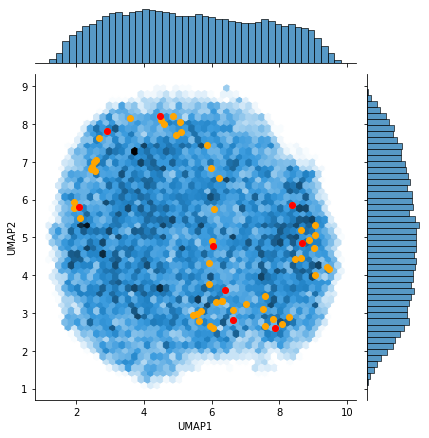

In [11]:
g = sns.jointplot(x=umap[:,0], y=umap[:,1], kind='hex')
g.set_axis_labels('UMAP1', 'UMAP2')
for i in ind:
    g.ax_joint.scatter(umap[i][0], umap[i][1], color='orange')
for i in ind[frames]:
    g.ax_joint.scatter(umap[i][0], umap[i][1], color='red')
# Save plot
plt.savefig('umap_graph-traversal_ATPase-dynamics.png')
plt.savefig('umap_graph-traversal_ATPase-dynamics.pdf')

## Acidic patch and macro domain dynamics figure

In [12]:
# Define which frames from the trajectory will have a different color
frames = np.array([0, 1, 2, 3, 5, 7, 9, 13, 15, 17, 21, 58], dtype=int)

In [13]:
len(frames)

12

In [14]:
ind[frames]

array([29536, 28217, 10838, 37244, 21027,  8971, 11607, 15391, 35042,
       38500, 35124, 11682])

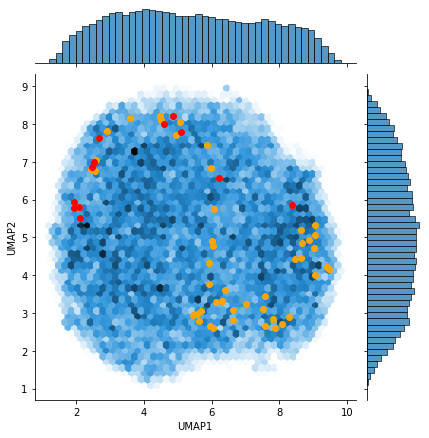

In [15]:
g = sns.jointplot(x=umap[:,0], y=umap[:,1], kind='hex')
g.set_axis_labels('UMAP1', 'UMAP2')
for i in ind:
    g.ax_joint.scatter(umap[i][0], umap[i][1], color='orange')
for i in ind[frames]:
    g.ax_joint.scatter(umap[i][0], umap[i][1], color='red')
# Save plot
plt.savefig('umap_graph-traversal_AP-and-macro-dynamics.png')
plt.savefig('umap_graph-traversal_AP-and-macro-dynamics.pdf')

## All frames for movie

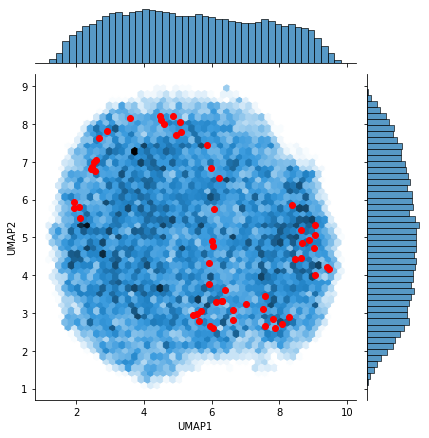

In [16]:
g = sns.jointplot(x=umap[:,0], y=umap[:,1], kind='hex')
g.set_axis_labels('UMAP1', 'UMAP2')
j = 0
for i in ind:
    g.ax_joint.scatter(umap[i][0], umap[i][1], color='red')
    # Save plot
    plt.savefig(f'umap_graph-traversal_frame_{j:02}.png')
    j = j+1